In [6]:
# 导入需要的包以及解决中文乱码的问题
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
import pandas as pd 
import numpy as np

second_data = pd.read_csv(r'./datas/hangzhou/secondHand.csv',encoding="gbk", parse_dates=['日期'])
columns = ['套数(套)', '总面积（平方米）', '住宅套数(套)', '住宅面积(平方米)']


bussiness_data = pd.read_csv(r'./datas/hangzhou/bussiness.csv',encoding="gbk", parse_dates=['日期'])
types = ['住宅', '商业用房', '写字楼', '其它', '合计']
columns2 = ['成交套数', '成交面积']

rm_weekend = True  # 是否删除周末数据
show_polyfit = True  # 曲线拟合
resample_by = ''    # W（星期），M（月），Q（季度），Y（年），10D（10天），3W（3周）
resample_func = 'mean'  # mean, sum

In [7]:
from datetime import datetime

def is_workday(day, separator=""):
    """
    if a day is workday
    :param day:
    :param separator: separator of year, month and day, default is empty
    :return: True: is workday; False: not workday
    """

    if day.weekday() in [0, 1, 2, 3, 4]:
        return True
    else:
        return False


def is_weekend(day, separator=""):
    """
    if a day is weekend
    :param day: 
    :param separator: separator of year, month and day, default is empty
    :return: True: is weekend; False: not weekend
    """
    # Monday == 0 ... Sunday == 6
    if day.weekday() in [5, 6]:
        return True
    else:
        return False
    
def group_data(data, key_word=None, names=None):
    data_list = []
    data = data.dropna(axis=0, how='any')
    if key_word is not None and names is not None :
        for name in names:
            data_i = data[data[key_word] == name]
            data_i.drop(columns=key_word, inplace=True)
            data_list.append(data_i)
        return data_list
    else:
        return [data]

def preprocess(data):
    data['is_workday']=data['日期'].map(lambda x:is_workday(x))
    if rm_weekend:
        data.drop(data[data['is_workday'] == False].index, inplace=True)
        data.drop(columns='is_workday', inplace=True)

    data.set_index('日期', drop=True, inplace=True)
    if resample_by is not None and len(resample_by) > 0:
        if resample_func == 'sum':
            data = data.resample(resample_by).sum()
        elif resample_func == 'mean':
            data = data.resample(resample_by).mean()
    return data

def all_preprocess(data, key_word=None, names=None):
    data_list = group_data(data, key_word, names)
    for i, data in enumerate(data_list):
        data_list[i] = preprocess(data)
    return data_list

In [8]:
def draw_subplot(ax, date, column_data, column_name, type_name):
    ax.plot(date, column_data, label=column_name)
    ax.scatter(date, column_data)
    ax.set_title(column_name, fontdict={'size': 20})
    ax.set_ylabel(type_name, fontdict={'size': 16})

    ax.legend(loc='best')
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xlabel("日期", fontdict={'size': 16})

    if show_polyfit:
        # 绘制拟合曲线
        deg = 2
        poly = np.polyfit(np.linspace(1, len(date), len(date)), np.array(column_data).astype(int), deg=deg)
        y_value = np.polyval(poly.astype(int), np.linspace(1, len(date), len(date)))
        ax.plot(date, y_value)
        ax.tick_params(labelsize=20) #刻度字体大小

def show_lineplot(data, date, columns):
       
    fig, axes = plt.subplots(len(types), 2, figsize=(30, 65), dpi=100, sharex=True)

    for i in range(len(types)):
        for j in range(2):
            ax = axes[i, j];
            draw_subplot(ax, date, data[i][columns[j]], columns[j], types[i])
    
    fig.autofmt_xdate()
    plt.subplots_adjust(wspace =0, hspace =0)#调整子图间距
    plt.tick_params(labelsize=20) #刻度字体大小
    plt.show()

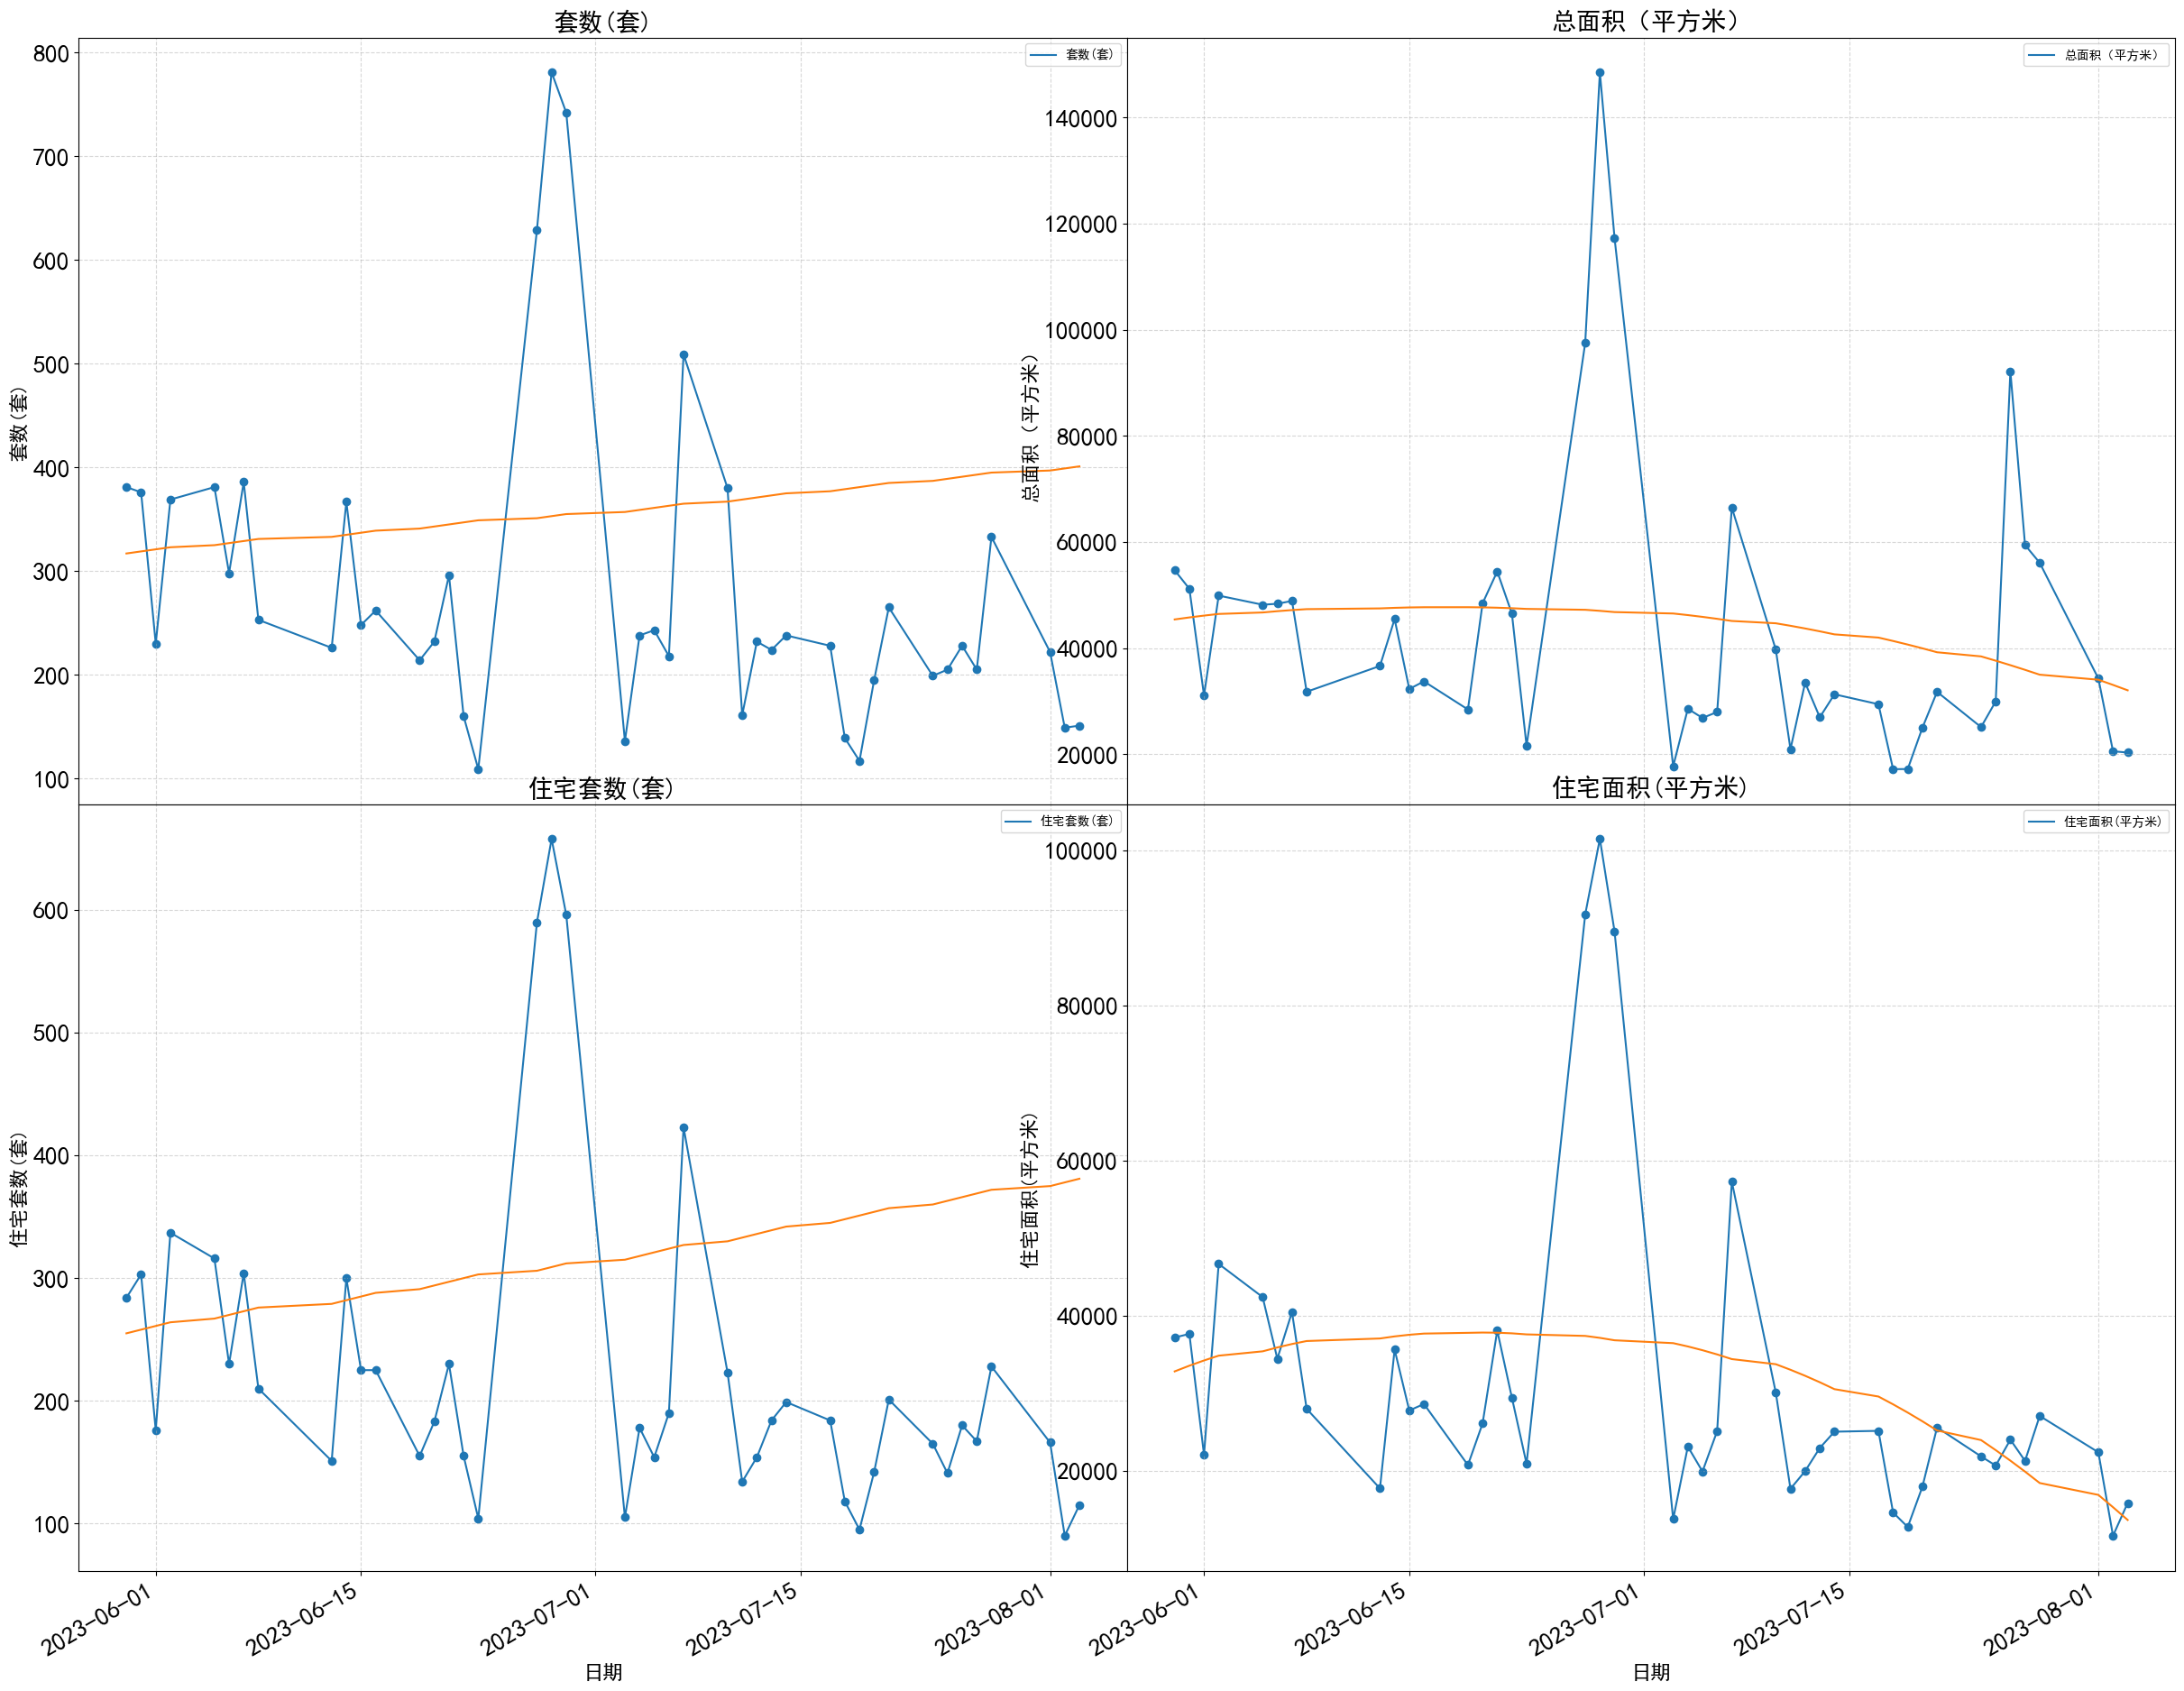

In [9]:
# 杭州 二手房 日数据

def draw_subplot(ax, date, column_data, column_name):
    ax.plot(date, column_data, label=column_name)
    ax.scatter(date, column_data)
    ax.set_title(column_name, fontdict={'size': 20})
    ax.set_ylabel(column_name, fontdict={'size': 16})

    ax.legend(loc='best')
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xlabel("日期", fontdict={'size': 16})

    if show_polyfit:
        # 绘制拟合曲线
        deg = 2
        poly = np.polyfit(np.linspace(1, len(date), len(date)), np.array(column_data).astype(int), deg=deg)
        y_value = np.polyval(poly.astype(int), np.linspace(1, len(date), len(date)))
        ax.plot(date, y_value)
        ax.tick_params(labelsize=20) #刻度字体大小

def show_lineplot(data, date, columns):
       
    fig, axes = plt.subplots(2, 2, figsize=(30, 25), dpi=100, sharex=True)

    k = 0;
    for i in range(2):
        for j in range(2):
            ax = axes[i, j];
            draw_subplot(ax, date, data[columns[k]], columns[k])
            k = k + 1;
    
    fig.autofmt_xdate()
    plt.subplots_adjust(wspace =0, hspace =0)#调整子图间距
    plt.tick_params(labelsize=20) #刻度字体大小
    plt.show()

    
second_data = all_preprocess(second_data)
date = second_data[0].index
show_lineplot(second_data[0], date, columns)

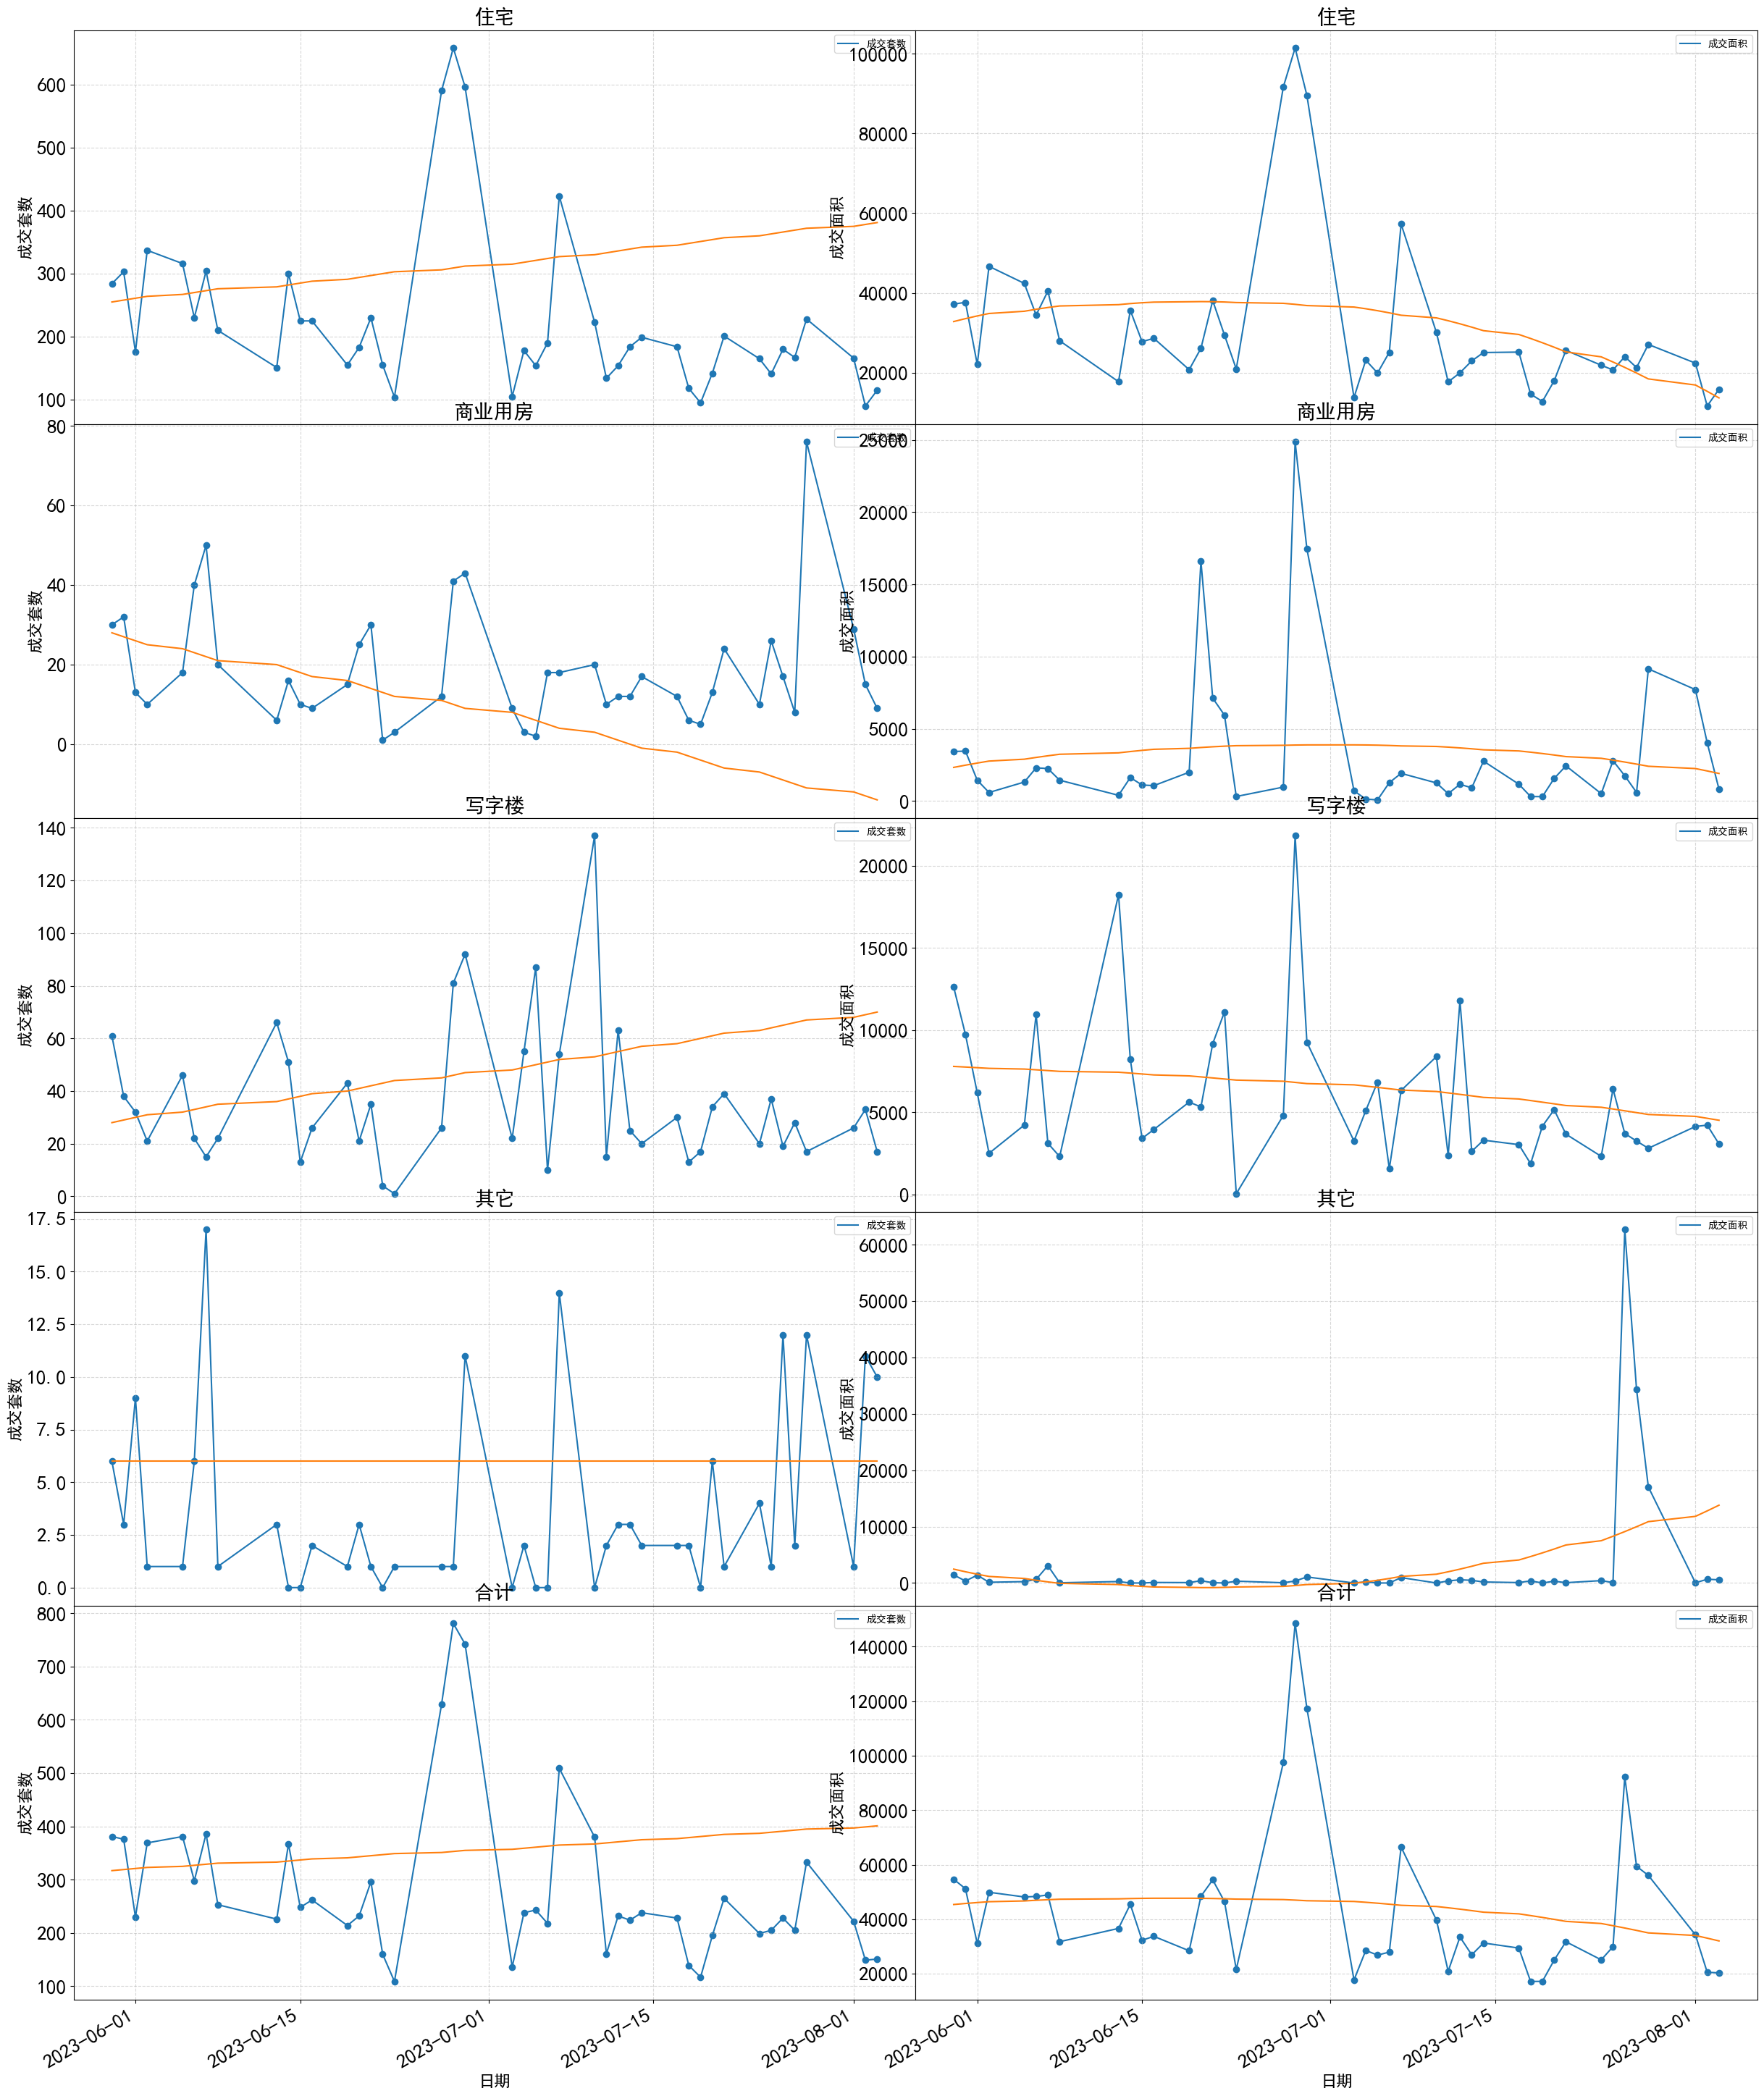

In [10]:
# 杭州 商品房 日数据
def show_lineplot(data, date, columns):

    def draw_subplot(ax, date, column_data, column_name, type_name):
        ax.plot(date, column_data, label=column_name)
        ax.scatter(date, column_data)
        ax.set_title(type_name, fontdict={'size': 20})
        ax.set_ylabel(column_name, fontdict={'size': 16})

        ax.legend(loc='best')
        ax.grid(True, linestyle='--', alpha=0.5)
        ax.set_xlabel("日期", fontdict={'size': 16})

        if show_polyfit:
            # 绘制拟合曲线
            deg = 2
            poly = np.polyfit(np.linspace(1, len(date), len(date)), np.array(column_data).astype(int), deg=deg)
            y_value = np.polyval(poly.astype(int), np.linspace(1, len(date), len(date)))
            ax.plot(date, y_value)
            ax.tick_params(labelsize=20) #刻度字体大小

    fig,axes = plt.subplots(len(types), len(columns), figsize=(30, 40), dpi=100, sharex=True);

    for i, data_i in enumerate(data):
        for j, col_j in enumerate(columns):
            ax = axes[i, j];
            draw_subplot(ax, date, data_i[col_j], col_j, types[i])
        
    
    fig.autofmt_xdate()
    plt.subplots_adjust(wspace =0, hspace =0)#调整子图间距
    plt.show()

bussiness_data = all_preprocess(bussiness_data, '房屋用途', types)
date = bussiness_data[0].index
show_lineplot(bussiness_data, date, columns2)